In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split

In [30]:
#data_path = "./datasets/WASSA23_essay_level_train_preproc.tsv"
data_path22 = "./datasets/WASSA22_essay_level_internal_train_preproc.tsv"
data_path23 = "./datasets/WASSA23_essay_level_original_train_preproc.tsv"
data22 = pd.read_csv(data_path22, sep='\t')
data23 = pd.read_csv(data_path23, sep='\t')
data = pd.concat([data22, data23], ignore_index=True)
data

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,distress_level,prompt_bio,prompt_emp,prompt_emo,conversation_id,article_id,speaker_id,speaker_number,split,prompt
0,5.667000,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,medium,An essay written by a 33.0 years old white mal...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
1,4.833000,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,medium,An essay written by a 33.0 years old white mal...,The essay expresses low empathy and medium dis...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
2,5.333000,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.00,...,low,An essay written by a 33.0 years old white mal...,The essay expresses medium empathy and low dis...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
3,4.167000,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.00,...,low,An essay written by a 33.0 years old white mal...,The essay expresses low empathy and low distre...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
4,5.333000,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,medium,An essay written by a 33.0 years old white mal...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1.000000,1.625,"After reading the article, i felt really alarm...",fear/hope,1.0,6.0,1.0,29.0,85000.0,6.75,...,low,"An essay written by a 29 years old white male,...",The essay expresses low empathy and low distre...,The top emotions expressed in the essay are: ...,430.0,397.0,17.0,1.0,train,"After reading the article, i felt really alarm..."
2433,2.500000,1.500,It's very difficult to fathom living somewhere...,joy/sadness,2.0,7.0,1.0,38.0,42000.0,7.00,...,medium,An essay written by a 38 years old white femal...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,374.0,367.0,24.0,1.0,train,It's very difficult to fathom living somewhere...
2434,3.166667,2.750,it's crazy how islamic terrorism is still a th...,anger/surprise,1.0,6.0,1.0,34.0,68000.0,5.50,...,medium,"An essay written by a 34 years old white male,...",The essay expresses low empathy and medium dis...,The top emotions expressed in the essay are: ...,260.0,174.0,46.0,2.0,train,it's crazy how islamic terrorism is still a th...
2435,6.666667,6.375,Humans are the most selfish and wicked of all ...,disgust/neutral,1.0,7.0,1.0,28.0,165000.0,6.25,...,medium,"An essay written by a 28 years old white male,...",The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,98.0,57.0,40.0,2.0,train,Humans are the most selfish and wicked of all ...


In [31]:
def split(data, k, val_size, shuffle, seed):
    splitter = KFold(n_splits=k, shuffle=shuffle, random_state=seed)
    for i, (train_idx, test_idx) in enumerate(splitter.split(data)):
        train_split = data.iloc[train_idx]
        test_split = data.iloc[test_idx]
        internal_train_split, internal_val_split = train_test_split(train_split, test_size=val_size)
        internal_train_split.to_csv(f"./dataset_empathy/internal_train_split{i}.tsv", sep='\t', index=False)
        internal_val_split.to_csv(f"./dataset_empathy/internal_val_split{i}.tsv", sep='\t', index=False)
        test_split.to_csv(f"./dataset_empathy/test_split{i}.tsv", sep='\t', index=False)

In [32]:
#split(data, k=3, val_size=0.1, shuffle=False, seed=None)

In [33]:
# split 0
int_train = pd.read_csv("./dataset_empathy/internal_train_split0.tsv", sep='\t')
int_val = pd.read_csv("./dataset_empathy/internal_val_split0.tsv", sep='\t')
test = pd.read_csv("./dataset_empathy/test_split0.tsv", sep='\t')

In [34]:
int_train

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,distress_level,prompt_bio,prompt_emp,prompt_emo,conversation_id,article_id,speaker_id,speaker_number,split,prompt
0,6.833333,6.625,The whole article broke my heart. If I got a t...,sadness,1.0,6.0,3.0,37.0,40000.0,7.00,...,medium,An essay written by a 37.0 years old black or ...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000,6.000,The whole drug topic really makes me sad as I ...,sadness,2.0,3.0,1.0,27.0,25000.0,6.00,...,medium,An essay written by a 27 years old white femal...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,418.0,301.0,53.0,2.0,train,The whole drug topic really makes me sad as I ...
2,5.833333,5.750,After reading an article on the consequences o...,hope,1.0,4.0,1.0,29.0,39000.0,6.00,...,low,An essay written by a 29.0 years old white mal...,The essay expresses medium empathy and low dis...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
3,6.000000,5.250,The fact that we don't take care of our vetera...,anger,2.0,6.0,1.0,46.0,22000.0,6.50,...,medium,An essay written by a 46.0 years old white fem...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
4,1.500000,1.750,It's crazy how many creatures are dying from t...,surprise,2.0,6.0,1.0,25.0,60000.0,6.00,...,low,An essay written by a 25.0 years old white fem...,The essay expresses low empathy and low distre...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6.666667,6.000,"The fires that killed more than 100,000 people...",sadness,1.0,6.0,2.0,32.0,35000.0,5.50,...,medium,An essay written by a 32.0 years old hispanic ...,The essay expresses low empathy and medium dis...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
1457,6.500000,4.125,I rememeber where I was when the Paris attack ...,fear,2.0,6.0,3.0,32.0,45000.0,6.00,...,medium,An essay written by a 32.0 years old black or ...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
1458,3.833333,2.000,It's terrible that so many people all around t...,neutral,2.0,6.0,1.0,46.0,22000.0,6.50,...,medium,An essay written by a 46.0 years old white fem...,The essay expresses low empathy and medium dis...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN
1459,1.000000,1.500,"After reading the article, the only feelings i...",sadness,1.0,6.0,1.0,29.0,85000.0,6.75,...,medium,An essay written by a 29.0 years old white mal...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...,NaN,NaN,NaN,NaN,NaN,NaN


## Read prediction on test set

In [41]:
pred_split0 = pd.read_csv("./empathy_pred/test_predictions_split0.tsv", sep='\t', names=['empathy', 'distress'])
pred_split1 = pd.read_csv("./empathy_pred/test_predictions_split1.tsv", sep='\t', names=['empathy', 'distress'])
pred_split2 = pd.read_csv("./empathy_pred/test_predictions_split2.tsv", sep='\t', names=['empathy', 'distress'])

In [42]:
pred_split0

,empathy,distress
0,5.376183,3.811739
1,6.152115,6.145944
2,5.562609,3.180759
3,3.622734,4.304273
4,4.996653,5.386345
...,...,...
95,5.772347,5.665911
96,5.955980,5.955089
97,5.323815,5.452311
98,4.710678,3.139248


In [43]:
test_pred = np.mean([pred_split0, pred_split1, pred_split2], axis=0)
test_pred.shape

(100, 2)

## Read predictions on train set

In [47]:
split0_pred = pd.read_csv("./empathy_pred/predictions_split0.tsv", sep='\t', names=['empathy', 'distress'])
split1_pred = pd.read_csv("./empathy_pred/predictions_split1.tsv", sep='\t', names=['empathy', 'distress'])
split2_pred = pd.read_csv("./empathy_pred/predictions_split2.tsv", sep='\t', names=['empathy', 'distress'])

In [48]:
data_split0 = pd.read_csv("./dataset_empathy/test_split0.tsv", sep='\t')
data_split1 = pd.read_csv("./dataset_empathy/test_split1.tsv", sep='\t')
data_split2 = pd.read_csv("./dataset_empathy/test_split2.tsv", sep='\t')

In [59]:
data_split0['empathy_pred'] = split0_pred['empathy']
data_split0['distress_pred'] = split0_pred['distress']

data_split1['empathy_pred'] = split1_pred['empathy']
data_split1['distress_pred'] = split1_pred['distress']

data_split2['empathy_pred'] = split2_pred['empathy']
data_split2['empathy_pred'] = split2_pred['empathy']

new_data = pd.concat([data_split0, data_split1, data_split2])

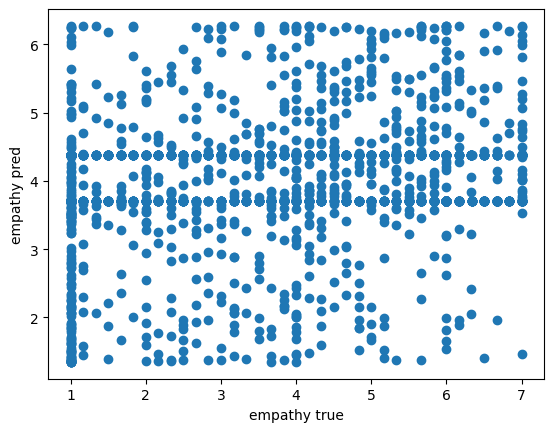

In [60]:
# plot empathy true vs empathy pred
plt.scatter(new_data['empathy'], new_data['empathy_pred'])
plt.xlabel('empathy true')
plt.ylabel('empathy pred')
plt.show()

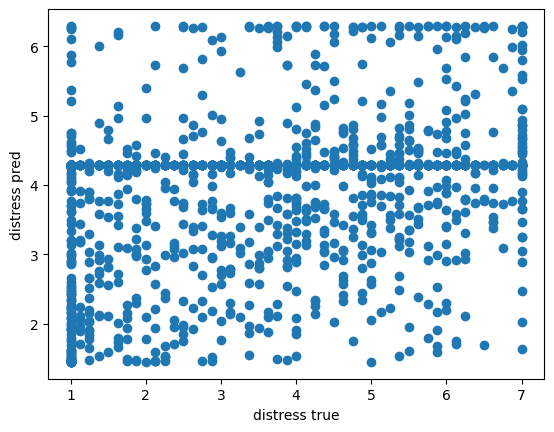

In [61]:
# plot distress true vs distress pred
plt.scatter(new_data['distress'], new_data['distress_pred'])
plt.xlabel('distress true')
plt.ylabel('distress pred')
plt.show()

In [71]:
empathy_level_true = []
distress_level_true = []
empathy_level_pred = []
distress_level_pred = []

for emp, dist in zip(new_data['empathy'], new_data['distress']):
    if emp < 3:
        empathy_level_true.append('low')
    elif emp >= 3 and emp <= 5:
        empathy_level_true.append('medium')
    else:
        empathy_level_true.append('high')
    if dist < 3:
        distress_level_true.append('low')
    elif dist >= 3 and dist <= 5:
        distress_level_true.append('medium')
    else:
        distress_level_true.append('high')

for emp, dist in zip(new_data['empathy_pred'], new_data['distress_pred']):
    if emp < 3:
        empathy_level_pred.append('low')
    elif emp >= 3 and emp <= 5:
        empathy_level_pred.append('medium')
    else:
        empathy_level_pred.append('high')
    if dist < 3:
        distress_level_pred.append('low')
    elif dist >= 3 and dist <= 5:
        distress_level_pred.append('medium')
    else:
        distress_level_pred.append('high')

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

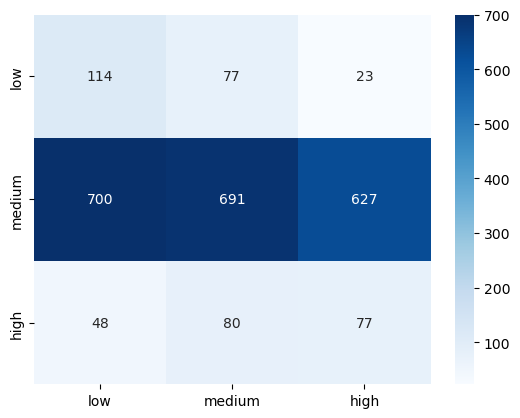

In [73]:
labels = ['low', 'medium', 'high']
cm_df = pd.DataFrame(confusion_matrix(empathy_level_pred, empathy_level_true, labels=labels),index=labels, columns=labels)
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g', xticklabels=True, yticklabels=True)

<Axes: >

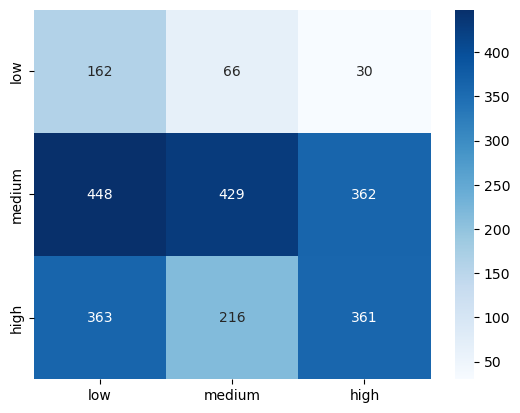

In [74]:
cm_df = pd.DataFrame(confusion_matrix(distress_level_pred, distress_level_true, labels=labels),index=labels, columns=labels)
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g', xticklabels=True, yticklabels=True)

## Update datasets